In [20]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tutti i dataset

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re


from visualizator import Visualizator
import utilities as ut


	########### !!!!!!!!!!!      dhfr     !!!!!!!!!! ##########


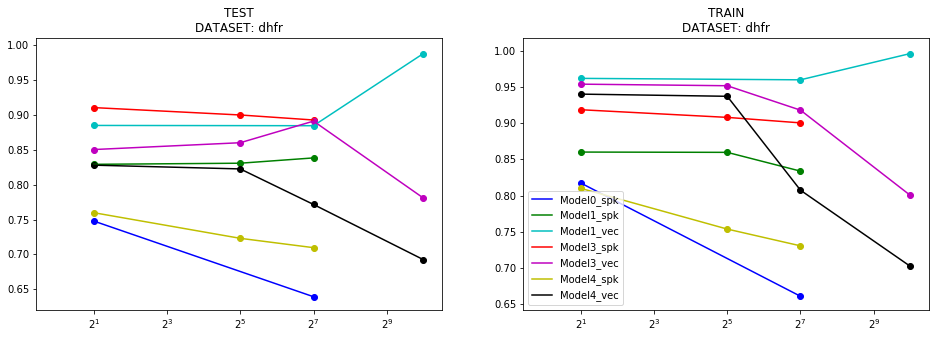


	########### !!!!!!!!!!!      aids     !!!!!!!!!! ##########


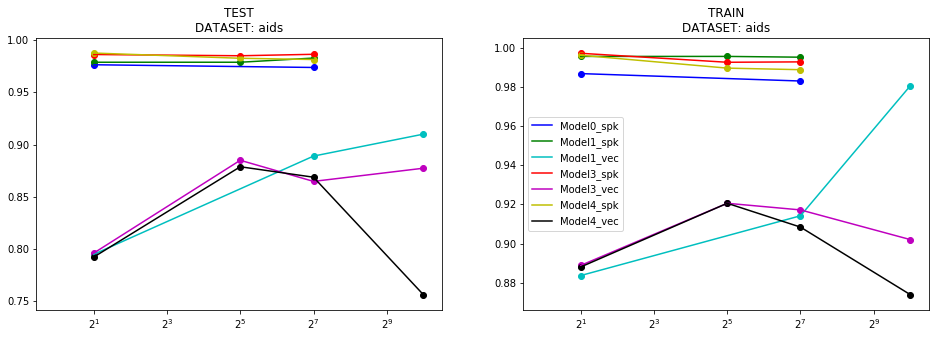


	########### !!!!!!!!!!!      leuk     !!!!!!!!!! ##########


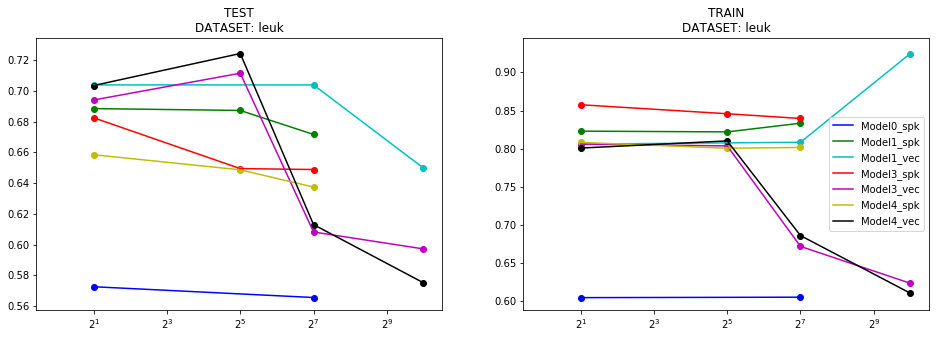


	########### !!!!!!!!!!!      canc     !!!!!!!!!! ##########


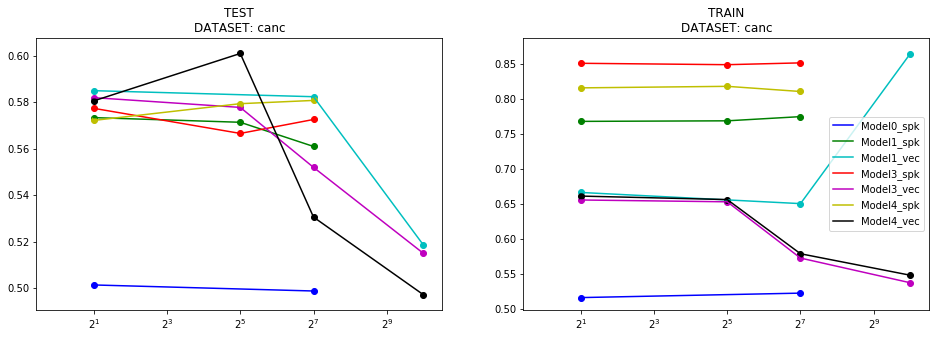

In [22]:
names=['dhfr','aids','leuk','canc']
plot_datasets_results(names)

In [23]:
dict_visualizators = gen_visualizators_dict(names)
ut.global_wlt(dict_visualizators)
ut.global_rank(dict_visualizators)

                                          sum
----------  --  --  --  --  --  --  --  -----
Model0_spk   0   0   1   0   1   0   2      4
Model1_spk   4   0   3   1   4   3   4     19
Model1_vec   3   1   0   2   4   2   4     16
Model3_spk   4   3   2   0   4   3   4     20
Model3_vec   3   0   0   0   0   1   4      8
Model4_spk   4   1   2   1   3   0   4     15
Model4_vec   2   0   0   0   0   0   0      2
              2    mean
----------  ---  ------
Model0_spk   24      24
Model1_spk    9       9
Model1_vec   12      12
Model3_spk    8       8
Model3_vec   20      20
Model4_spk   13      13
Model4_vec   26      26


# su singolo DATASET

In [38]:
#name = "aids"
name = "dhfr"
#name = "canc"
#name = "aids"

plot_5_embeds_all_models(name)

In [34]:
dataset = 'dhfr'

#model = "Model1_spk"
#model = "Model1_vec"
#model = "Model3_spk"
#model = "Model3_vec"
model = "Model4_spk"
#model = "Model4_vec"

#model = "Model0_spk"

name = "Results/"+dataset+"/"+model+"_res_"+dataset + ".npy"

acc_128_test,acc_128_train,acc_32_test,acc_32_train,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train = retrive_info(name)

In [52]:
#plot_acc_wrt_dim_emb(acc_128_test,acc_128_train,acc_32_test,acc_32_train,acc_2_test,acc_2_train)

In [53]:
#plot_acc_wrt_dim_emb2(acc_128_train,acc_32_train,acc_2_train,model,txt=(model+" "+dataset))

In [54]:
#plot_acc_wrt_dim_emb2(acc_128_test,acc_32_test,acc_2_test,model,txt=(model+" "+dataset))

In [3]:
def plot_acc_wrt_dim_emb2(acc_128,acc_32,acc_2,model,txt=''):
    
    acc_emb_grow = []
    acc_emb_grow.append(acc_128)
    acc_emb_grow.append(acc_32)
    acc_emb_grow.append(acc_2)
    acc_emb_grow = np.flip(acc_emb_grow,axis=0)
    
    col= ['b','g','c','m','k']
    text=txt+"\nAccuracy wrt dim.embedding"
    metric = acc_emb_grow
    if (model == "Model1_vec"):
        n_bits = [2,128,1024]
    else:
        n_bits = [2,32,128]
    mean = []
    std = []
    for i in metric:
        mean.append(np.mean(i))
        std.append(np.std(i))
        

    plt.figure(figsize=(8,4))
    plt.title(text)
    plt.plot(n_bits,mean,'r:',label="mean")
    plt.scatter(n_bits,mean,color='r')
    #low = [mean[i]-std[i] for i in range(0,len(mean))] 
    #upp = [mean[i]+std[i] for i in range(0,len(mean))]
    #plt.fill_between(n_bits,low,upp, facecolor='r',alpha=0.2)
    #plt.xscale('log')
    
    n_times = len(acc_128)
    for i in range(n_times):
        sigle = []
        sigle.append(acc_128[i])
        sigle.append(acc_32[i])
        sigle.append(acc_2[i])

        plt.plot(n_bits,sigle,color=col[i],alpha=0.5,label=("Iter: "+str(i)))
        plt.scatter(n_bits,sigle,color=col[i],alpha=0.5)
        
        
        
    plt.xlabel("nbits of Vectorize")
    plt.ylabel("Accuracy")
    plt.legend()
    #plt.ylim((0,1.1))
    plt.show()

In [19]:
import matplotlib
import matplotlib.pyplot as plt
def plot_acc_wrt_dim_emb(acc_128_test,acc_128_train,acc_32_test,acc_32_train,acc_2_test,acc_2_train):
    print("TEST")
    acc_emb_grow = []
    acc_emb_grow.append(acc_128_test)
    acc_emb_grow.append(acc_32_test)
    acc_emb_grow.append(acc_2_test)
    acc_emb_grow = np.flip(acc_emb_grow,axis=0)
    plot_nbits(acc_emb_grow,[2,32,128],text="TEST\nAccuracy wrt dim.embedding")
    print("TRAIN")
    acc_emb_grow = []
    acc_emb_grow.append(acc_128_train)
    acc_emb_grow.append(acc_32_train)
    acc_emb_grow.append(acc_2_train)
    acc_emb_grow = np.flip(acc_emb_grow,axis=0)
    plot_nbits(acc_emb_grow,[2,32,128],text="TRAIN\nAccuracy wrt dim.embedding")


def plot_nbits(metric,n_bits,text="Accuracy"):
    
    mean = []
    std = []
    for i in metric:
        mean.append(np.mean(i))
        std.append(np.std(i))

    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title(text)
    plt.plot(n_bits,mean,color='b')
    plt.scatter(n_bits,mean,color='b')
    #plt.xscale('log')
    plt.xlabel("nbits of Vectorize")
    plt.ylabel("Accuracy")


    plt.subplot(122)
    plt.title(text)
    plt.plot(n_bits,mean,color='b')
    plt.scatter(n_bits,mean,color='b')
    low = [mean[i]-std[i] for i in range(0,len(mean))] 
    upp = [mean[i]+std[i] for i in range(0,len(mean))]
    plt.fill_between(n_bits,low,upp, facecolor='b', label='Std',alpha=0.2)
    #plt.xscale('log')
    plt.xlabel("nbits of Vectorize")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.show()
    
    
import matplotlib.pyplot as plt
import matplotlib





def plot_5_embeds_all_models(name):
    path = "Results/"+name
    files = os.listdir(path)
    files.sort()
    for file in files:
        print("\n\t\t\t\t\t"+file)
        res_path = os.path.join(path,file)
        tmp = list(file.split('_'))
        model_name = tmp[0]+'_'+tmp[1]
        if(model_name == "Model0_spk"):
            _,_,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train= retrive_info(res_path,2)
        elif (model_name == 'Model3_vec' or model_name == 'Model4_vec' ):
            _,_,_,_,_,_,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train= retrive_info(res_path,4)

        else:
            _,_,_,_,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train= retrive_info(res_path)


        plot_5_embeds(X2_test,l_test, acc_2_test,text="TEST")
        plot_5_embeds(X2_train,l_train, acc_2_train,text="TRAIN")


def plot_datasets_results(names):
    for name in names:
        print("\n\t########### !!!!!!!!!!!      "+ name + "     !!!!!!!!!! ##########")
        models_mean_res,models_res,models_names = extract_model_res(name)
        models_accuracy_test = retrive_test_or_train(models_mean_res,'test')
        models_accuracy_train = retrive_test_or_train(models_mean_res,'train')
        plot_models_results(models_accuracy_test,models_accuracy_train,models_names,name)
        
        
def plot_models_results(models_accuracy_test,models_accuracy_train,models_names,name):

    col= ['b','g','c','r','m','y','k']
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    for i in range(len(models_accuracy_test)):
        if (models_names[i].split("_")[1] == 'vec'):
            a = [2,128,1024]
            if (len(models_accuracy_test[i])==4):
                a = [2,32,128,1024]
        else:
            if(models_names[i].split("_")[0]=="Model0"):
                a = [2,128]
            else:
                a = [2,32,128]
                
        plt.plot(a,models_accuracy_test[i],color=col[i],label=models_names[i])
        plt.scatter(a,models_accuracy_test[i],color=col[i])

    plt.title("TEST\nDATASET: "+name)
    #plt.ylim((0,1.05))
    plt.xscale('log', basex=2)


    plt.subplot(122)
    for i in range(len(models_accuracy_train)):
        if (models_names[i].split("_")[1] == 'vec'):
            a = [2,128,1024]
            if (len(models_accuracy_train[i])==4):
                a = [2,32,128,1024]
        else:
            if(models_names[i].split("_")[0]=="Model0"):
                a = [2,128]
            else:
                a = [2,32,128]
             
        plt.plot(a,models_accuracy_train[i],color=col[i],label=models_names[i])
        plt.scatter(a,models_accuracy_train[i],color=col[i])
    
    plt.title("TRAIN\nDATASET: "+name)
    #plt.ylim((0,1.05))
    plt.xscale('log', basex=2)
    plt.legend()
    plt.show()


def extract_model_res(name):
    path = "Results/"+name
    files = os.listdir(path)
    files.sort()
    models_names = []
    models_res = []
    for file in files:
        # numpy pickle file
        if file.endswith(".npy"):
            # extract model name
            tmp = list(file.split('_'))
            model_name = tmp[0]+'_'+tmp[1]
            models_names.append(model_name)

            #retrive_info
            res_path = os.path.join(path,file)
            if (model_name == 'Model0_spk' ):
                model_res = list(retrive_info(res_path,2))
                ### tmp prendi solo le acc
                model_res = model_res[0:4]
                models_res.append(model_res)
            
            elif (model_name == 'Model3_vec' or model_name == 'Model4_vec' ):
                model_res = list(retrive_info(res_path,4))
                ### tmp prendi solo le acc
                model_res = model_res[0:8]
                models_res.append(model_res)
            
            else:
                model_res = list(retrive_info(res_path))
                ### tmp prendi solo le acc
                model_res = model_res[0:6]
                models_res.append(model_res)
            
            
        #### take only means:
        models_mean_res = []
        for model in models_res:
            model_mean_res = []
            for emb_dim in model:
                model_mean_res.append(np.mean(emb_dim))
            models_mean_res.append(model_mean_res)
        
    return(models_mean_res,models_res,models_names)



def retrive_test_or_train(data,info="test"):
    
    acc_models = []
    if(info=="test"):
        pos = 0
    else:
        pos = 1
    for model in data:
        for d in range(len(model)):
            if (d == 0):
                acc_models.append(model[pos::2])

    return(acc_models)


In [5]:
  
def plot_5_embeds(X2_in,l_in,acc_in,text=""):
    colors = ['red','blue']
    n_emb = len(X2_in)
    plt.figure(figsize=(20,4))
    for i in range(n_emb):
        plt.subplot('1'+str(n_emb)+str(i))
        X2_tmp = np.array(X2_in[i])
        #print(X2_test)
        x = X2_tmp[:,0]
        y = X2_tmp[:,1]
        plt.title("Iteration: "+str(i+1)+"\n"+text+"\nacc:"+str(acc_in[i]))
        plt.scatter(x,y,s=8,c=l_in[i],cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()

In [6]:

def retrive_info(name,n_models = 3):
    res = np.load(name, allow_pickle=True)
    
    if (n_models == 2):
        acc_128_test = list(res[0])
        acc_128_train = list(res[1])
        acc_2_test = list(res[2])
        acc_2_train = list(res[3])

        X2_test = to_list(res[4])
        X2_train = to_list(res[5])

        l_test = to_list([res[6]])[0]
        l_train = to_list([res[7]])[0]

        return(acc_128_test,acc_128_train,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train)
    
    elif (n_models == 3):
        acc_128_test = list(res[0])
        acc_128_train = list(res[1])
        acc_32_test = list(res[2])
        acc_32_train = list(res[3])
        acc_2_test = list(res[4])
        acc_2_train = list(res[5])

        X2_test = to_list(res[6])
        X2_train = to_list(res[7])

        l_test = to_list([res[8]])[0]
        l_train = to_list([res[9]])[0]

        return(acc_128_test,acc_128_train,acc_32_test,acc_32_train,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train)
    else:
        
        acc_1024_test = list(res[0])
        acc_1024_train = list(res[1])
        acc_128_test = list(res[2])
        acc_128_train = list(res[3])
        acc_32_test = list(res[4])
        acc_32_train = list(res[5])
        acc_2_test = list(res[6])
        acc_2_train = list(res[7])

        X2_test = to_list(res[8])
        X2_train = to_list(res[9])

        l_test = to_list([res[10]])[0]
        l_train = to_list([res[11]])[0]

        return(acc_1024_test,acc_1024_train,acc_128_test,acc_128_train,acc_32_test,acc_32_train,acc_2_test,acc_2_train,X2_test,X2_train,l_test,l_train)
def to_list(xs):
    list_xs = []
    for x in xs:
        list_x = []
        for i in x:
            list_x.append(list(i))

        list_xs.append(list_x)

    return(list_xs)
    

In [7]:
def gen_visualizators_dict(names):
    dict_visualizators = {}
    for name in names:
        vis, n = gen_visualizator(name)

        dict_visualizators[n] = vis
    return(dict_visualizators)
    

def gen_visualizator(name):
    path = "Results/"+name
    files = os.listdir(path)
    files.sort()
    dimensions = [2]
    n_classifiers = len(files)
    acc_test = []
    names = []
    for file in files:

        res_path = os.path.join(path,file)
        tmp = list(file.split('_'))
        model_name = tmp[0]+'_'+tmp[1]
        names.append(model_name)
        if (model_name == "Model0_spk"):
            _,_,acc_2_test,acc_2_train,_,_,_,_ = retrive_info(res_path,2)
        elif (model_name == 'Model3_vec' or model_name == 'Model4_vec' ):
            _,_,_,_,_,_,acc_2_test,acc_2_train,_,_,_,_= retrive_info(res_path,4)

        else:
            _,_,_,_,acc_2_test,acc_2_train,_,_,_,_ = retrive_info(res_path)

        acc_test.append(acc_2_test)


    tmp_vis = Visualizator(dimensions,n_classifiers,names)
    for i in range(n_classifiers):
        tmp_vis.accuracy[i][0] = acc_test[i]

    return(tmp_vis,name)
